In [56]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
%matplotlib inline
quandl.ApiConfig.api_key = 'yDsZNbJArbvQby72sxM9'

portfolio_df = pd.read_excel('portfolio.xlsx').set_index('stock')
start_date = '2014-01-01'
end_date = '2019-01-01'

In [9]:
portfolio_df.head()

,symbol,shares,avg_cost,current_price
stock,,,,
Google,GOOG,5,100,200
IBM,IBM,2,50,300
Apple,AAPL,10,20,200


In [111]:
data = {}
for index, row in portfolio_df.iterrows():
    call = 'WIKI/' + row['symbol']
    stock = pd.DataFrame()
    stock['Adj. Close'] = quandl.get(call, start_date=start_date, end_date=end_date)['Adj. Close']
    stock['EWMA'] = stock['Adj. Close'].ewm(span=30).mean()
    stock['Diff EWMA'] = stock['EWMA'] - stock['EWMA'].shift(1)
    stock['EWMA sign change'] = stock['Diff EWMA'] * stock['Diff EWMA'].shift(1) 
    stock['Diff2 EWMA'] = stock['Diff EWMA'] - stock['Diff EWMA'].shift(1)
    data[row['symbol']] = stock

In [112]:
goog = data['GOOG']
goog.dropna().head(20)

,Adj. Close,EWMA,Diff EWMA,EWMA sign change,Diff2 EWMA
Date,,,,,
2014-03-31,556.97,558.439111,-0.811389,-0.641403,-1.601889
2014-04-01,567.16,560.842034,2.402923,-1.949704,3.214311
2014-04-02,567.00,562.243120,1.401086,3.366702,-1.001836
2014-04-03,569.74,563.709767,1.466646,2.054898,0.065560
2014-04-04,543.14,560.152092,-3.557675,-5.217851,-5.024322
2014-04-07,538.15,556.718975,-3.433117,12.213914,0.124559
2014-04-08,554.90,556.458947,-0.260028,0.892706,3.173089
2014-04-09,564.14,557.477114,1.018167,-0.264752,1.278195
2014-04-10,540.95,555.425914,-2.051200,-2.088464,-3.069367


In [119]:
def trade_signal(row):
    if row['EWMA sign change'] >= 0:
        return 0
    else:
        if row['Diff2 EWMA'] > 0:
            return -100
        else:
            return 100
goog.dropna(inplace=True)
goog.loc[:,'Trade signal'] = goog.apply(trade_signal, axis=1)
goog['Traded Amount'] = goog['Trade signal'] * goog['Adj. Close']

In [120]:
print(goog)
print("Total Gain: ", goog['Traded Amount'].sum())

            Adj. Close         EWMA  Diff EWMA  EWMA sign change  Diff2 EWMA  \
Date                                                                           
2014-03-31      556.97   558.439111  -0.811389         -0.641403   -1.601889   
2014-04-01      567.16   560.842034   2.402923         -1.949704    3.214311   
2014-04-02      567.00   562.243120   1.401086          3.366702   -1.001836   
2014-04-03      569.74   563.709767   1.466646          2.054898    0.065560   
2014-04-04      543.14   560.152092  -3.557675         -5.217851   -5.024322   
2014-04-07      538.15   556.718975  -3.433117         12.213914    0.124559   
2014-04-08      554.90   556.458947  -0.260028          0.892706    3.173089   
2014-04-09      564.14   557.477114   1.018167         -0.264752    1.278195   
2014-04-10      540.95   555.425914  -2.051200         -2.088464   -3.069367   
2014-04-11      530.60   552.518036  -2.907879          5.964640   -0.856679   
2014-04-14      532.52   550.292734  -2.

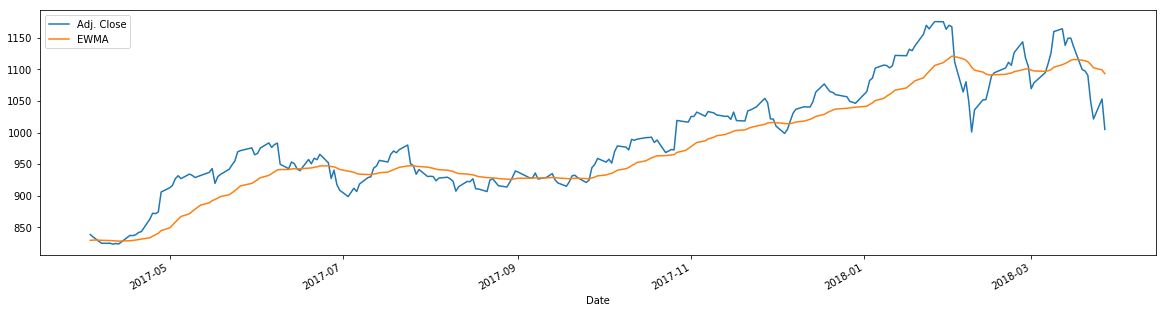

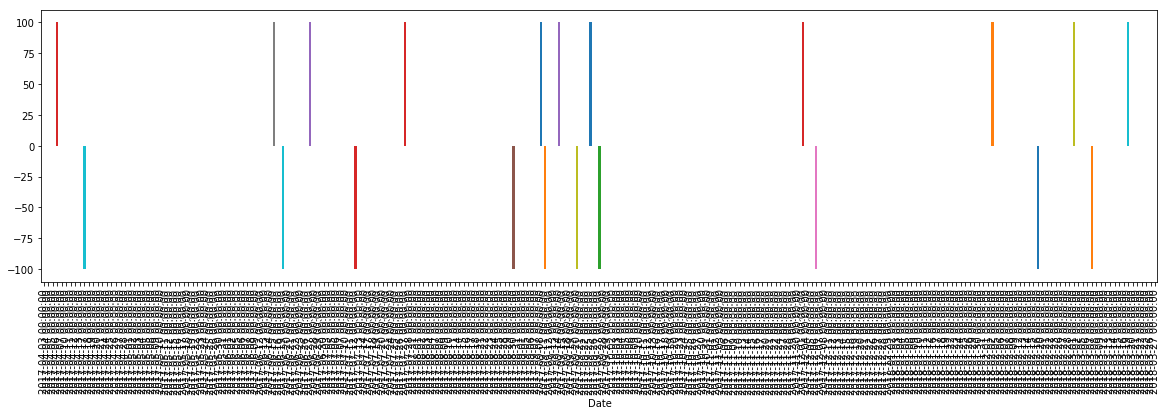

In [123]:
goog[['Adj. Close', 'EWMA']]['2017-04':'2018-04'].plot(figsize=[20,5])
plt.figure()
goog['Trade signal']['2017-04':'2018-04'].plot(kind='bar', figsize=[20,5])
